# Birth Rate in Canada

### By Fabiha Chowdhury

In [1]:
import pandas as pd
import numpy as np
from math import floor
import scipy.stats as sc
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import re


In [2]:
sns.set_theme

<function seaborn.rcmod.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)>

In [3]:
pip install beautifulsoup4 requests

Note: you may need to restart the kernel to use updated packages.


### Web Scraping

In [4]:
page = requests.get("https://www150.statcan.gc.ca/n1/pub/91f0015m/91f0015m2024001-eng.htm")
page

<Response [200]>

In [5]:
len(page.content)

346732

In [6]:
str(page.content)[:200]

'b\'<!DOCTYPE html>\\r\\n\\r\\n<!--[if lt IE 9]><html class="no-js lt-ie9" lang="en" dir="ltr" xmlns="http://www.w3.org/1999/xhtml"><![endif]--><!--[if gt IE 8]><!-->\\r\\n<html class="no-js" lang="en" dir="l'

In [7]:
soup = BeautifulSoup(page.content)
print(soup.prettify())

<!DOCTYPE html>
<!--[if lt IE 9]><html class="no-js lt-ie9" lang="en" dir="ltr" xmlns="http://www.w3.org/1999/xhtml"><![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" dir="ltr" lang="en" xmlns="http://www.w3.org/1999/xhtml">
 <!--<![endif]-->
 <!-- METADATA BEGINS | DEBUT DES METADONNEES -->
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width,initial-scale=1" name="viewport"/>
  <meta content="This article provides an in-depth look at trends in fertility in Canada from 1921 to 2022. The evolution of the total fertility rate (TFR) over time is examined, with a special focus on shifts that have occurred following the onset of the COVID-19 pandemic. The shifts observed in Canada's TFR from 2019 to 2022 are situated in an international context, and differences among the provincial and territories are explored. Also, year-over-year changes in the monthly number of births are analyzed and contrasted with the experience of other countries. Lastly, trends in age-specifi

In [8]:
# Extract all headings
headings = soup.find_all(['h1', 'h2', 'h3'])
for heading in headings:
    print(heading.text.strip())

Language selection
Search and menus
Search
Topics menu
Demographic Documents
        Fertility in Canada, 1921 to 2022
Correction Notice
Acknowledgements
Highlights
Introduction
Total fertility rate
Canada’s total fertility rate reaches a new low in 2022
Variation in the total fertility rate by province and territory
Quebec sees a reversal in fertility trends in recent decades
Nunavut continues to post an exceptionally high fertility rate
International trends in the total fertility rate
Many countries saw a substantial decrease in fertility from 2021 to 2022, but Canada’s was among the largest
How could the COVID-19 pandemic impact fertility?
The monthly evolution of births following the onset of the COVID-19 pandemic
Decrease in conceptions in the first stage of the pandemic
Canada and other countries ride the fertility “pandemic rollercoaster”
Average age of childbearing and age-specific fertility rates
The average age at childbirth continues to rise for both mothers and fathers
Mult

In [9]:
# Extract all paragraphs
paragraphs = soup.find_all('p')
for paragraph in paragraphs:
    print(paragraph.text.strip())

On February 1, 2024, a  correction was made to the text in the section entitled “Quebec  sees a reversal in fertility trends in recent decades”. The text passage  originally read “Quebec’s TFR in 2022 (1.36) was the lowest recorded in the  province since 2002 (1.47) and equalled the previous record low observed in  1987 (1.36) …”. The corrected text reads “Quebec’s TFR in 2022 (1.49) was the  lowest recorded in the province since 2002 (1.47). The record low was observed  in 1987 (1.36) …”.
Skip to text
Text begins
The authors would like to thank a number of Statistics Canada colleagues for their contribution to this study. Early drafts of this document benefited from the input of Laurent Martel, Anne Milan, Patrice Dion, Ana Fostik, Patrick Charbonneau, France-Pascale Ménard, Valérie Gaston, Heather Hobson and Zoë Sayle. We would also like to thank Carol D’Aoust and Stéphane Mongeau for processing and compiling the data that contributed to this study.
This article provides an in-depth 

In [10]:
# headings to extract
headings_list = [
    'Total fertility rate',
    'Variation in the total fertility rate by province and territory',
    'Average age of childbearing and age-specific fertility rates',
    'The average age at childbirth continues to rise for both mothers and fathers',
    'The rate of childlessness is trending higher'
]

In [11]:
# URL of the webpage containing the tables
url = "https://www150.statcan.gc.ca/n1/pub/91f0015m/91f0015m2024001-eng.htm"

# Reading all tables from the webpage into a list of DataFrames
tables = pd.read_html(url)

# Checking the number of tables detected
print(f"Number of tables detected: {len(tables)}")

Number of tables detected: 12


In [12]:
# Total Fertility Rate table
df_fr = tables[0]
df_fr

,Year,Cohort replacement level,Total fertility rate
,Year,Cohort replacement level,number of children per woman
0,1921,2.1,3.48
1,1922,2.1,3.40
2,1923,2.1,3.23
3,1924,2.1,3.22
4,1925,2.1,3.13
...,...,...,...
98,2019,2.1,1.47
99,2020Data table for Chart 1 Note 5,2.1,1.41
100,2021,2.1,1.44


In [13]:
#Province Fertility table
df_pr = tables[1]
df_pr

,Year,Canada,Newfoundland and Labrador,Prince Edward Island,Nova Scotia,New Brunswick,Quebec,Ontario,Manitoba,Saskatchewan,Alberta,British Columbia,Yukon,Northwest Territories,Nunavut
,Year,number of children per woman,number of children per woman,number of children per woman,number of children per woman,number of children per woman,number of children per woman,number of children per woman,number of children per woman,number of children per woman,number of children per woman,number of children per woman,number of children per woman,number of children per woman,number of children per woman
0,2002,1.52,1.32,1.49,1.39,1.40,1.47,1.50,1.81,1.84,1.69,1.39,1.56,1.93,3.01
1,2003,1.55,1.33,1.60,1.39,1.43,1.50,1.52,1.82,1.88,1.74,1.42,1.50,2.08,3.06
2,2004,1.56,1.32,1.58,1.43,1.42,1.50,1.55,1.80,1.86,1.74,1.43,1.63,2.10,3.05
3,2005,1.58,1.36,1.54,1.42,1.43,1.54,1.57,1.84,1.87,1.75,1.44,1.42,2.12,2.81
4,2006,1.63,1.41,1.65,1.42,1.48,1.65,1.59,1.89,1.91,1.81,1.47,1.61,2.12,2.92
5,2007,1.67,1.44,1.64,1.50,1.53,1.68,1.61,1.96,2.03,1.89,1.52,1.57,2.19,3.02
6,2008,1.70,1.55,1.74,1.56,1.60,1.76,1.63,1.97,2.06,1.90,1.52,1.62,2.09,2.98
7,2009,1.69,1.55,1.71,1.53,1.61,1.74,1.62,1.99,2.08,1.87,1.51,1.62,2.07,3.18
8,2010,1.65,1.53,1.65,1.51,1.61,1.70,1.58,1.93,2.03,1.80,1.45,1.56,1.99,2.96


In [14]:
#Age table
age_df = tables[4]
age_df

,Year,Mothers,Fathers
,Year,average age in years,average age in years
0,1974,26.8,30.1
1,1975,26.7,30.1
2,1976,26.7,30.1
3,1977,26.8,30.2
4,1978,26.8,30.3
5,1979,26.9,30.3
6,1980,27.0,30.3
7,1981,27.1,30.5
8,1982,27.1,30.5


In [15]:
# Women aged 50+ with no child table
no_df = tables[9]
no_df

,Year,Proportion (%)
0,1990,14.1
1,2001,14.1
2,2006,14.4
3,2011,15.3
4,2017,16.3
5,2022,17.4
6,Note: The data were weighted to represent the ...,Note: The data were weighted to represent the ...


### EDA

#### Total birth rate

In [16]:
df_fr

,Year,Cohort replacement level,Total fertility rate
,Year,Cohort replacement level,number of children per woman
0,1921,2.1,3.48
1,1922,2.1,3.40
2,1923,2.1,3.23
3,1924,2.1,3.22
4,1925,2.1,3.13
...,...,...,...
98,2019,2.1,1.47
99,2020Data table for Chart 1 Note 5,2.1,1.41
100,2021,2.1,1.44


In [17]:
df_fr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 3 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0   (Year, Year)                                          103 non-null    object
 1   (Cohort replacement level, Cohort replacement level)  103 non-null    object
 2   (Total fertility rate, number of children per woman)  103 non-null    object
dtypes: object(3)
memory usage: 2.5+ KB


In [18]:
df_fr.dtypes

Year                      Year                            object
Cohort replacement level  Cohort replacement level        object
Total fertility rate      number of children per woman    object
dtype: object

In [19]:
# Assuming df_fr is your DataFrame
print(df_fr.columns.levels)


[['Cohort replacement level', 'Total fertility rate', 'Year'], ['Cohort replacement level', 'Year', 'number of children per woman']]


In [20]:
# To display column names as a list
print(df_fr.columns.tolist())


[('Year', 'Year'), ('Cohort replacement level', 'Cohort replacement level'), ('Total fertility rate', 'number of children per woman')]


In [21]:
df_fr.rename(columns={'Year': 'Year', 'Cohort replacement level': 'replacement level','number of children per woman' :'Total fertility rate'}, inplace=True)
df_fr

,Year,replacement level,Total fertility rate
,Year,replacement level,Total fertility rate
0,1921,2.1,3.48
1,1922,2.1,3.40
2,1923,2.1,3.23
3,1924,2.1,3.22
4,1925,2.1,3.13
...,...,...,...
98,2019,2.1,1.47
99,2020Data table for Chart 1 Note 5,2.1,1.41
100,2021,2.1,1.44


In [22]:
# Assuming df_fr is your MultiIndex DataFrame
df_br = df_fr.reset_index()
df_br

,index,Year,replacement level,Total fertility rate
,,Year,replacement level,Total fertility rate
0,0,1921,2.1,3.48
1,1,1922,2.1,3.40
2,2,1923,2.1,3.23
3,3,1924,2.1,3.22
4,4,1925,2.1,3.13
...,...,...,...,...
98,98,2019,2.1,1.47
99,99,2020Data table for Chart 1 Note 5,2.1,1.41
100,100,2021,2.1,1.44


In [23]:
df_br.columns = ['_'.join(col).strip() for col in df_br.columns.values]
df_br

,index_,Year_Year,replacement level_replacement level,Total fertility rate_Total fertility rate
0,0,1921,2.1,3.48
1,1,1922,2.1,3.40
2,2,1923,2.1,3.23
3,3,1924,2.1,3.22
4,4,1925,2.1,3.13
...,...,...,...,...
98,98,2019,2.1,1.47
99,99,2020Data table for Chart 1 Note 5,2.1,1.41
100,100,2021,2.1,1.44
101,101,2022,2.1,1.33


In [24]:
df_br.dtypes

index_                                        int64
Year_Year                                    object
replacement level_replacement level          object
Total fertility rate_Total fertility rate    object
dtype: object

In [25]:
df_br.rename(columns={'index_': 'index','Year_Year': 'Year', 'replacement level_replacement level': 'replacement level','Total fertility rate_Total fertility rate' :'Total birthrate'}, inplace=True)
df_br

,index,Year,replacement level,Total birthrate
0,0,1921,2.1,3.48
1,1,1922,2.1,3.40
2,2,1923,2.1,3.23
3,3,1924,2.1,3.22
4,4,1925,2.1,3.13
...,...,...,...,...
98,98,2019,2.1,1.47
99,99,2020Data table for Chart 1 Note 5,2.1,1.41
100,100,2021,2.1,1.44
101,101,2022,2.1,1.33


In [26]:
# Dropping note row
df_br = df_br.drop(index=102)

In [27]:
# Group by only the things we need
br_df = df_br.groupby('Year')['Total birthrate'].sum().reset_index()
br_df

,Year,Total birthrate
0,1921,3.48
1,1922,3.40
2,1923,3.23
3,1924,3.22
4,1925,3.13
...,...,...
97,2018,1.51
98,2019,1.47
99,2020Data table for Chart 1 Note 5,1.41
100,2021,1.44


In [28]:
br_df['Year'].unique()


array(['1921', '1922', '1923', '1924', '1925', '1926', '1927', '1928',
       '1929Data table for Chart 1\xa0Note\xa01',
       '1930Data table for Chart 1\xa0Note\xa01',
       '1931Data table for Chart 1\xa0Note\xa01',
       '1932Data table for Chart 1\xa0Note\xa01',
       '1933Data table for Chart 1\xa0Note\xa01',
       '1934Data table for Chart 1\xa0Note\xa01',
       '1935Data table for Chart 1\xa0Note\xa01',
       '1936Data table for Chart 1\xa0Note\xa01',
       '1937Data table for Chart 1\xa0Note\xa01',
       '1938Data table for Chart 1\xa0Note\xa01',
       '1939Data table for Chart 1\xa0Note\xa01\xa0Data table for Chart 1\xa0Note\xa02',
       '1940Data table for Chart 1\xa0Note\xa02',
       '1941Data table for Chart 1\xa0Note\xa02',
       '1942Data table for Chart 1\xa0Note\xa02',
       '1943Data table for Chart 1\xa0Note\xa02',
       '1944Data table for Chart 1\xa0Note\xa02',
       '1945Data table for Chart 1\xa0Note\xa02', '1946', '1947', '1948',
       '1949', '

In [29]:
# Turning year to only numerical
br_df['Year'] = pd.to_numeric(br_df['Year'], errors='coerce')
br_df = br_df.dropna(subset=['Year'])
br_df

,Year,Total birthrate
0,1921.0,3.48
1,1922.0,3.40
2,1923.0,3.23
3,1924.0,3.22
4,1925.0,3.13
...,...,...
96,2017.0,1.55
97,2018.0,1.51
98,2019.0,1.47
100,2021.0,1.44


In [30]:
br_df['Year'].unique()

array([1921., 1922., 1923., 1924., 1925., 1926., 1927., 1928., 1946.,
       1947., 1948., 1949., 1950., 1951., 1952., 1953., 1954., 1955.,
       1956., 1957., 1958., 1959., 1961., 1962., 1963., 1964., 1965.,
       1966., 1967., 1968., 1970., 1971., 1972., 1973., 1974., 1975.,
       1976., 1977., 1978., 1979., 1980., 1981., 1982., 1983., 1984.,
       1985., 1986., 1987., 1988., 1989., 1990., 1991., 1992., 1993.,
       1994., 1995., 1996., 1997., 1998., 1999., 2000., 2001., 2002.,
       2003., 2004., 2005., 2006., 2007., 2008., 2009., 2010., 2011.,
       2012., 2013., 2014., 2015., 2016., 2017., 2018., 2019., 2021.,
       2022.])

Text(0, 0.5, 'Rate')

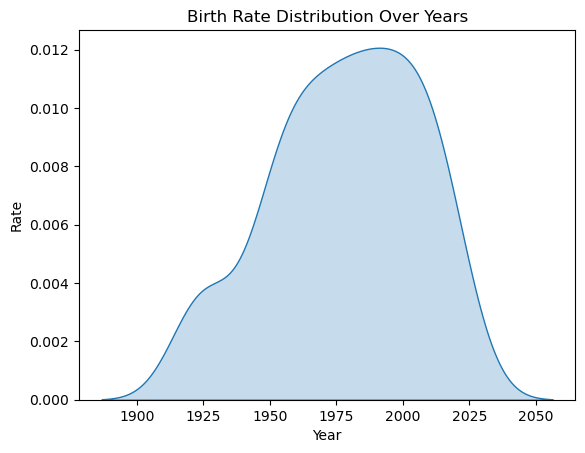

In [31]:
sns.kdeplot(data=br_df, x='Year', fill=True)
plt.title('Birth Rate Distribution Over Years')
plt.xlabel('Year')
plt.ylabel('Rate')

#### Province Brith rate

In [32]:
df_pr

,Year,Canada,Newfoundland and Labrador,Prince Edward Island,Nova Scotia,New Brunswick,Quebec,Ontario,Manitoba,Saskatchewan,Alberta,British Columbia,Yukon,Northwest Territories,Nunavut
,Year,number of children per woman,number of children per woman,number of children per woman,number of children per woman,number of children per woman,number of children per woman,number of children per woman,number of children per woman,number of children per woman,number of children per woman,number of children per woman,number of children per woman,number of children per woman,number of children per woman
0,2002,1.52,1.32,1.49,1.39,1.40,1.47,1.50,1.81,1.84,1.69,1.39,1.56,1.93,3.01
1,2003,1.55,1.33,1.60,1.39,1.43,1.50,1.52,1.82,1.88,1.74,1.42,1.50,2.08,3.06
2,2004,1.56,1.32,1.58,1.43,1.42,1.50,1.55,1.80,1.86,1.74,1.43,1.63,2.10,3.05
3,2005,1.58,1.36,1.54,1.42,1.43,1.54,1.57,1.84,1.87,1.75,1.44,1.42,2.12,2.81
4,2006,1.63,1.41,1.65,1.42,1.48,1.65,1.59,1.89,1.91,1.81,1.47,1.61,2.12,2.92
5,2007,1.67,1.44,1.64,1.50,1.53,1.68,1.61,1.96,2.03,1.89,1.52,1.57,2.19,3.02
6,2008,1.70,1.55,1.74,1.56,1.60,1.76,1.63,1.97,2.06,1.90,1.52,1.62,2.09,2.98
7,2009,1.69,1.55,1.71,1.53,1.61,1.74,1.62,1.99,2.08,1.87,1.51,1.62,2.07,3.18
8,2010,1.65,1.53,1.65,1.51,1.61,1.70,1.58,1.93,2.03,1.80,1.45,1.56,1.99,2.96


In [33]:
df_pr.dtypes

Year                       Year                            object
Canada                     number of children per woman    object
Newfoundland and Labrador  number of children per woman    object
Prince Edward Island       number of children per woman    object
Nova Scotia                number of children per woman    object
New Brunswick              number of children per woman    object
Quebec                     number of children per woman    object
Ontario                    number of children per woman    object
Manitoba                   number of children per woman    object
Saskatchewan               number of children per woman    object
Alberta                    number of children per woman    object
British Columbia           number of children per woman    object
Yukon                      number of children per woman    object
Northwest Territories      number of children per woman    object
Nunavut                    number of children per woman    object
dtype: obj

In [34]:
# Creating a province column
provinces = ['Canada', 'Newfoundland and Labrador', 'Prince Edward Island', 'Nova Scotia', 'New Brunswick', 'Quebec', 'Ontario', 'Manitoba', 'Saskatchewan', 'Alberta', 'British Columbia', 'Yukon', 'Northwest Territories', 'Nunavut']
year_columns = [col for col in df_pr.columns if 'Year' in col]
df_melted = df_pr.melt(id_vars=year_columns, var_name='Province', value_name='number of children per woman')
df_melted['Province'] = df_melted['Province'].str.replace('_number of children per woman', '')

df_melted

,"(Year, Year)",Province,number of children per woman
0,2002,Canada,1.52
1,2003,Canada,1.55
2,2004,Canada,1.56
3,2005,Canada,1.58
4,2006,Canada,1.63
...,...,...,...
303,2019,Nunavut,2.80
304,2020,Nunavut,3.12
305,2021,Nunavut,2.70
306,2022,Nunavut,2.23


In [35]:
df_melted.dtypes

(Year, Year)                    object
Province                        object
number of children per woman    object
dtype: object

In [36]:
df_melted.columns = ['_'.join(col).strip() for col in df_melted.columns.values]
df_melted

,Year_Year,P_r_o_v_i_n_c_e,n_u_m_b_e_r_ _o_f_ _c_h_i_l_d_r_e_n_ _p_e_r_ _w_o_m_a_n
0,2002,Canada,1.52
1,2003,Canada,1.55
2,2004,Canada,1.56
3,2005,Canada,1.58
4,2006,Canada,1.63
...,...,...,...
303,2019,Nunavut,2.80
304,2020,Nunavut,3.12
305,2021,Nunavut,2.70
306,2022,Nunavut,2.23


In [37]:
df_melted.rename(columns={'Year_Year': 'Year','P_r_o_v_i_n_c_e':'Province','n_u_m_b_e_r_ _o_f_ _c_h_i_l_d_r_e_n_ _p_e_r_ _w_o_m_a_n':'Number of child'}, inplace=True)
df_melted

,Year,Province,Number of child
0,2002,Canada,1.52
1,2003,Canada,1.55
2,2004,Canada,1.56
3,2005,Canada,1.58
4,2006,Canada,1.63
...,...,...,...
303,2019,Nunavut,2.80
304,2020,Nunavut,3.12
305,2021,Nunavut,2.70
306,2022,Nunavut,2.23


In [38]:
df_melted['Year'].unique()

array(['2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021', '2022',
       '... not applicable  Notes: Births for which the age of the mother is unknown were prorated using the observed distribution. The 2022 data are considered preliminary. Starting in 2017, the calculation for Canada excludes Yukon.  Sources: Statistics Canada, Canadian Vital Statistics - Birth database (CVSB), Annual Demographic Estimates: Canada, Provinces and Territories.'],
      dtype=object)

In [39]:
# Dropping rows where 'Province' is 'Canada' since Yukon is not included in the calculation
df_filtered = df_melted[df_melted['Province'] != 'Canada'].reset_index(drop=True)
df_filtered

,Year,Province,Number of child
0,2002,Newfoundland and Labrador,1.32
1,2003,Newfoundland and Labrador,1.33
2,2004,Newfoundland and Labrador,1.32
3,2005,Newfoundland and Labrador,1.36
4,2006,Newfoundland and Labrador,1.41
...,...,...,...
281,2019,Nunavut,2.80
282,2020,Nunavut,3.12
283,2021,Nunavut,2.70
284,2022,Nunavut,2.23


In [40]:
df_pro = df_filtered[pd.to_numeric(df_melted['Year'], errors='coerce').notnull()]
df_pro

C:\Users\taefa\AppData\Local\Temp\ipykernel_12284\4193380123.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_pro = df_filtered[pd.to_numeric(df_melted['Year'], errors='coerce').notnull()]


,Year,Province,Number of child
0,2002,Newfoundland and Labrador,1.32
1,2003,Newfoundland and Labrador,1.33
2,2004,Newfoundland and Labrador,1.32
3,2005,Newfoundland and Labrador,1.36
4,2006,Newfoundland and Labrador,1.41
...,...,...,...
280,2018,Nunavut,2.96
281,2019,Nunavut,2.80
282,2020,Nunavut,3.12
283,2021,Nunavut,2.70


In [41]:
df_pro['Year'].unique()

array(['2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021', '2022'], dtype=object)

In [42]:
df_pro['Province'].unique()

array(['Newfoundland and Labrador', 'Prince Edward Island', 'Nova Scotia',
       'New Brunswick', 'Quebec', 'Ontario', 'Manitoba', 'Saskatchewan',
       'Alberta', 'British Columbia', 'Yukon', 'Northwest Territories',
       'Nunavut'], dtype=object)

In [43]:
df_pro['Number of child'].unique()

array(['1.32', '1.33', '1.36', '1.41', '1.44', '1.55', '1.53', '1.40',
       '1.38', '1.47', '1.46', '1.37', '1.30', '1.27', '1.22', '1.49',
       '1.60', '1.58', '1.54', '1.65', '1.64', '1.74', '1.71', '1.67',
       '1.66', '1.68', '1.61', '1.45', '1.43', '1.39', '1.42', '1.50',
       '1.56', '1.51', '1.52', '1.35', '1.24', '1.11', '1.18', '1.48',
       '1.57', '1.76', '1.70', '1.59', '1.63', '1.62', '1.81', '1.82',
       '1.80', '1.84', '1.89', '1.96', '1.97', '1.99', '1.93', '1.88',
       '1.94', '1.92', '1.90', '1.87', '1.85', '1.78', '1.75', '1.86',
       '1.91', '2.03', '2.06', '2.08', '2.01', '2.04', '2.00', '1.83',
       '1.79', '1.69', '1.77', '1.23', '1.21',
       'Note\xa0...: not applicable', '2.10', '2.12', '2.19', '2.09',
       '2.07', '1.73', '3.01', '3.06', '3.05', '2.81', '2.92', '3.02',
       '2.98', '3.18', '2.96', '2.85', '2.90', '3.09', '2.88', '3.04',
       '2.99', '2.80', '3.12', '2.70', '2.23'], dtype=object)

In [44]:
df_pro['Number of child'] = pd.to_numeric(df_pro['Number of child'], errors='coerce')
df_prov = df_pro.dropna(subset=['Number of child']).reset_index(drop=True)

df_prov

C:\Users\taefa\AppData\Local\Temp\ipykernel_12284\3038939485.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pro['Number of child'] = pd.to_numeric(df_pro['Number of child'], errors='coerce')


,Year,Province,Number of child
0,2002,Newfoundland and Labrador,1.32
1,2003,Newfoundland and Labrador,1.33
2,2004,Newfoundland and Labrador,1.32
3,2005,Newfoundland and Labrador,1.36
4,2006,Newfoundland and Labrador,1.41
...,...,...,...
262,2018,Nunavut,2.96
263,2019,Nunavut,2.80
264,2020,Nunavut,3.12
265,2021,Nunavut,2.70


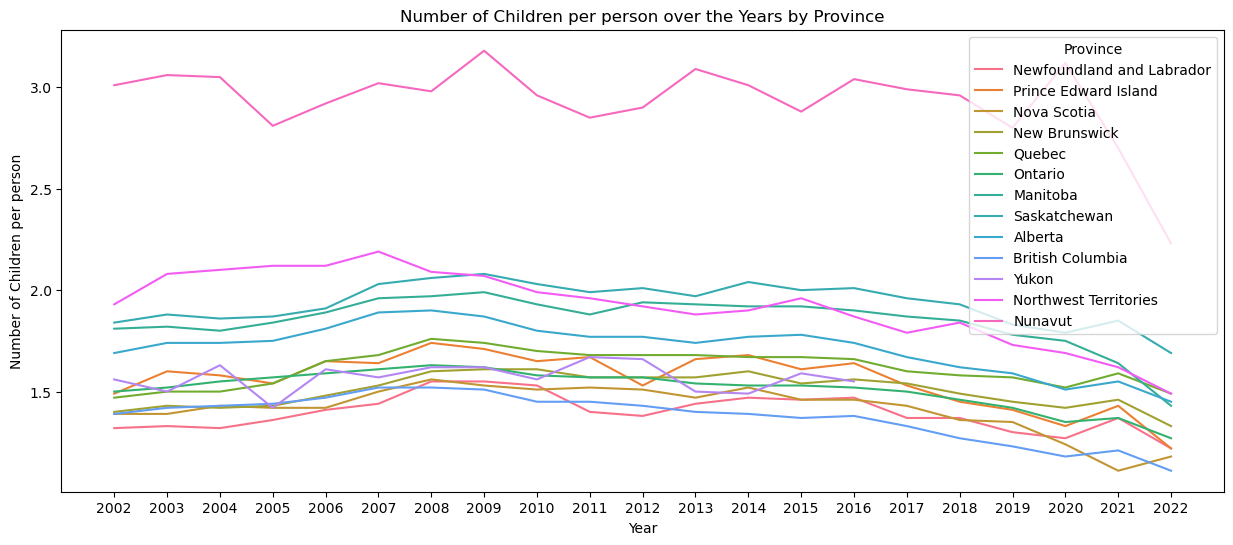

In [45]:
plt.figure(figsize=(15, 6))
sns.lineplot(data=df_prov, x='Year', y='Number of child', hue='Province')
plt.title('Number of Children per person over the Years by Province')
plt.xlabel('Year')
plt.ylabel('Number of Children per person')
plt.show()

#### Parents Age

In [46]:
age_df

,Year,Mothers,Fathers
,Year,average age in years,average age in years
0,1974,26.8,30.1
1,1975,26.7,30.1
2,1976,26.7,30.1
3,1977,26.8,30.2
4,1978,26.8,30.3
5,1979,26.9,30.3
6,1980,27.0,30.3
7,1981,27.1,30.5
8,1982,27.1,30.5


In [47]:
age_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   (Year, Year)                     50 non-null     object
 1   (Mothers, average age in years)  50 non-null     object
 2   (Fathers, average age in years)  50 non-null     object
dtypes: object(3)
memory usage: 1.3+ KB


In [48]:
# Creating a parent column
age_df.columns = ['Year', 'Mothers', 'Fathers']
df_melta = age_df.melt(id_vars=['Year'], var_name='Parent', value_name='average age in years')
df_melta

,Year,Parent,average age in years
0,1974,Mothers,26.8
1,1975,Mothers,26.7
2,1976,Mothers,26.7
3,1977,Mothers,26.8
4,1978,Mothers,26.8
...,...,...,...
95,2019,Fathers,34.2
96,2020,Fathers,34.2
97,2021,Fathers,34.2
98,2022,Fathers,34.4


In [49]:
df_melta.drop(index=99)

,Year,Parent,average age in years
0,1974,Mothers,26.8
1,1975,Mothers,26.7
2,1976,Mothers,26.7
3,1977,Mothers,26.8
4,1978,Mothers,26.8
...,...,...,...
94,2018,Fathers,34.0
95,2019,Fathers,34.2
96,2020,Fathers,34.2
97,2021,Fathers,34.2


In [50]:
df_melta['Year'].unique()

array(['1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981',
       '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022',
       'Notes: Births for which the age of the mother or father is unknown were prorated using the observed distribution. The 2022 data are considered preliminary. Mid-year age is used. Starting in 2017, the calculation for Canada excludes Yukon.  Sources: Statistics Canada, Canadian Vital Statistics - Birth database (CVSB), Annual Demographic Estimates: Canada, Provinces and Territories.'],
      dtype=object)

In [51]:
df_melta['Parent'].unique()

array(['Mothers', 'Fathers'], dtype=object)

In [52]:
df_melta['average age in years'].unique()

array(['26.8', '26.7', '26.9', '27.0', '27.1', '27.2', '27.3', '27.4',
       '27.5', '27.6', '27.7', '27.8', '27.9', '28.0', '28.1', '28.2',
       '28.3', '28.5', '28.7', '28.8', '29.0', '29.1', '29.3', '29.5',
       '29.6', '29.7', '29.8', '29.9', '30.1', '30.2', '30.3', '30.4',
       '30.5', '30.6', '30.7', '30.9', '31.0', '31.2', '31.3', '31.4',
       '31.6',
       'Notes: Births for which the age of the mother or father is unknown were prorated using the observed distribution. The 2022 data are considered preliminary. Mid-year age is used. Starting in 2017, the calculation for Canada excludes Yukon.  Sources: Statistics Canada, Canadian Vital Statistics - Birth database (CVSB), Annual Demographic Estimates: Canada, Provinces and Territories.',
       '31.1', '31.5', '31.7', '31.9', '32.0', '32.1', '32.2', '32.4',
       '32.5', '32.6', '32.7', '32.8', '33.0', '33.1', '33.2', '33.3',
       '33.5', '33.6', '33.7', '33.9', '34.0', '34.2', '34.4'],
      dtype=object)

In [53]:
df_par= df_melta[df_melta['Year'] != 'Notes: Births for which the age of the mother or father is unknown were prorated using the observed distribution. The 2022 data are considered preliminary. Mid-year age is used. Starting in 2017, the calculation for Canada excludes Yukon.  Sources: Statistics Canada, Canadian Vital Statistics - Birth database (CVSB), Annual Demographic Estimates: Canada, Provinces and Territories.']

In [54]:
df_par['Year'].unique()

array(['1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981',
       '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022'], dtype=object)

In [55]:
df_par['average age in years'].unique()

array(['26.8', '26.7', '26.9', '27.0', '27.1', '27.2', '27.3', '27.4',
       '27.5', '27.6', '27.7', '27.8', '27.9', '28.0', '28.1', '28.2',
       '28.3', '28.5', '28.7', '28.8', '29.0', '29.1', '29.3', '29.5',
       '29.6', '29.7', '29.8', '29.9', '30.1', '30.2', '30.3', '30.4',
       '30.5', '30.6', '30.7', '30.9', '31.0', '31.2', '31.3', '31.4',
       '31.6', '31.1', '31.5', '31.7', '31.9', '32.0', '32.1', '32.2',
       '32.4', '32.5', '32.6', '32.7', '32.8', '33.0', '33.1', '33.2',
       '33.3', '33.5', '33.6', '33.7', '33.9', '34.0', '34.2', '34.4'],
      dtype=object)

In [56]:
df_par

,Year,Parent,average age in years
0,1974,Mothers,26.8
1,1975,Mothers,26.7
2,1976,Mothers,26.7
3,1977,Mothers,26.8
4,1978,Mothers,26.8
...,...,...,...
94,2018,Fathers,34.0
95,2019,Fathers,34.2
96,2020,Fathers,34.2
97,2021,Fathers,34.2


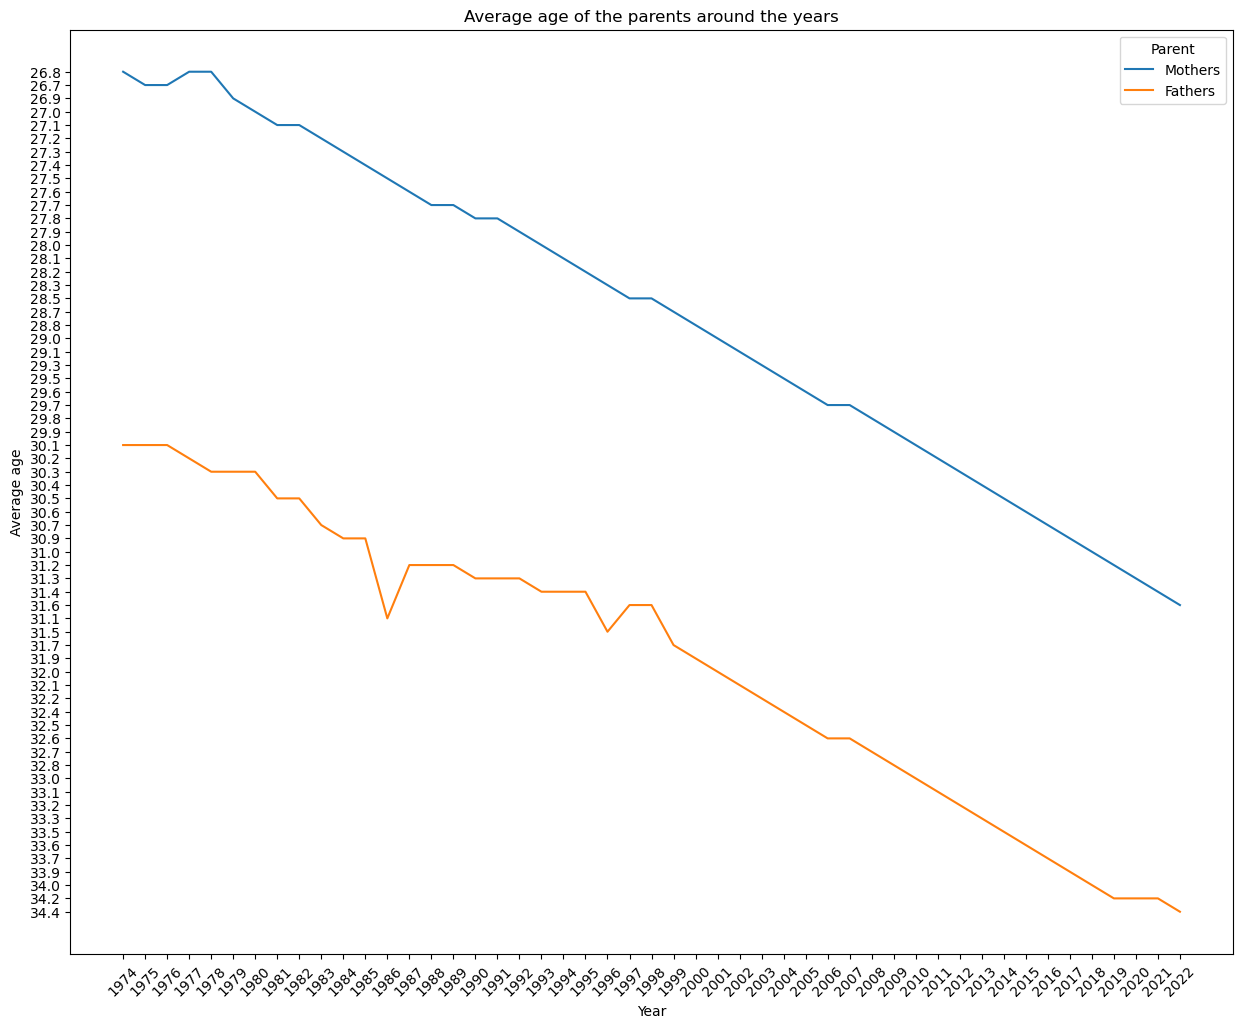

In [57]:
plt.figure(figsize=(15, 12))
sns.lineplot(data=df_par, x='Year', hue='Parent', y='average age in years')
plt.title('Average age of the parents around the years')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.ylabel('Average age')
plt.show()

#### Childless

In [58]:
no_df

,Year,Proportion (%)
0,1990,14.1
1,2001,14.1
2,2006,14.4
3,2011,15.3
4,2017,16.3
5,2022,17.4
6,Note: The data were weighted to represent the ...,Note: The data were weighted to represent the ...


In [59]:
# Dropping the row 'note'
df_no= no_df.drop(index=6)
df_no

,Year,Proportion (%)
0,1990,14.1
1,2001,14.1
2,2006,14.4
3,2011,15.3
4,2017,16.3
5,2022,17.4


Text(0, 0.5, 'Proportion (%)')

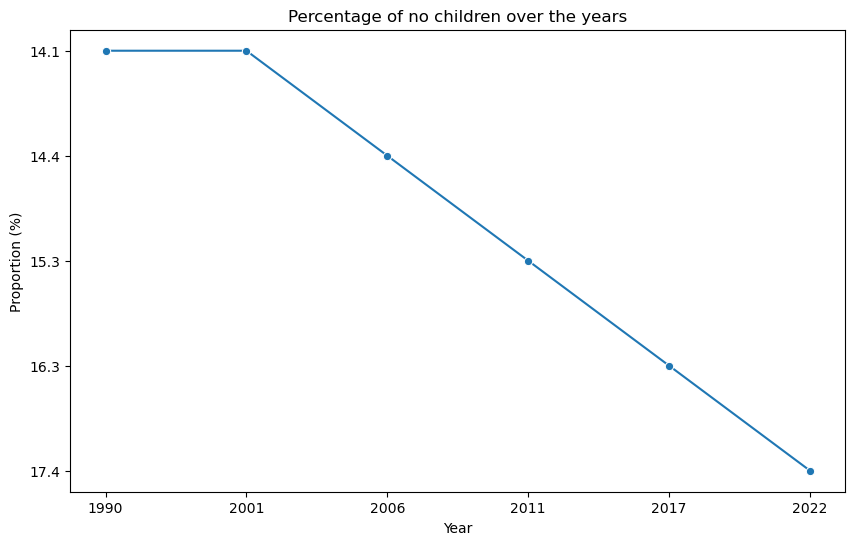

In [60]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_no, x='Year', y='Proportion (%)', marker='o')
plt.title('Percentage of no children over the years')
plt.xlabel('Year')
plt.ylabel('Proportion (%)')

#### Final Data

In [61]:
br_df

,Year,Total birthrate
0,1921.0,3.48
1,1922.0,3.40
2,1923.0,3.23
3,1924.0,3.22
4,1925.0,3.13
...,...,...
96,2017.0,1.55
97,2018.0,1.51
98,2019.0,1.47
100,2021.0,1.44


In [62]:
df_prov

,Year,Province,Number of child
0,2002,Newfoundland and Labrador,1.32
1,2003,Newfoundland and Labrador,1.33
2,2004,Newfoundland and Labrador,1.32
3,2005,Newfoundland and Labrador,1.36
4,2006,Newfoundland and Labrador,1.41
...,...,...,...
262,2018,Nunavut,2.96
263,2019,Nunavut,2.80
264,2020,Nunavut,3.12
265,2021,Nunavut,2.70


In [63]:
df_par

,Year,Parent,average age in years
0,1974,Mothers,26.8
1,1975,Mothers,26.7
2,1976,Mothers,26.7
3,1977,Mothers,26.8
4,1978,Mothers,26.8
...,...,...,...
94,2018,Fathers,34.0
95,2019,Fathers,34.2
96,2020,Fathers,34.2
97,2021,Fathers,34.2


In [64]:
df_no

,Year,Proportion (%)
0,1990,14.1
1,2001,14.1
2,2006,14.4
3,2011,15.3
4,2017,16.3
5,2022,17.4


In [65]:
import pandas as pd

# Convert 'Year' to int in all DataFrames
br_df['Year'] = br_df['Year'].astype(int)
df_prov['Year'] = df_prov['Year'].astype(int)
df_par['Year'] = df_par['Year'].astype(int)
df_no['Year'] = df_no['Year'].astype(int)

# Merging the DataFrames on 'Year'
merged_df = pd.merge(br_df, df_prov, on='Year', how='outer')
merged_df = pd.merge(merged_df, df_par, on='Year', how='outer')
merged_df = pd.merge(merged_df, df_no, on='Year', how='outer')

# Displaying the merged DataFrame
merged_df


C:\Users\taefa\AppData\Local\Temp\ipykernel_12284\4169809690.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  br_df['Year'] = br_df['Year'].astype(int)
C:\Users\taefa\AppData\Local\Temp\ipykernel_12284\4169809690.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_par['Year'] = df_par['Year'].astype(int)


,Year,Total birthrate,Province,Number of child,Parent,average age in years,Proportion (%)
0,1921,3.48,NaN,NaN,NaN,NaN,NaN
1,1922,3.40,NaN,NaN,NaN,NaN,NaN
2,1923,3.23,NaN,NaN,NaN,NaN,NaN
3,1924,3.22,NaN,NaN,NaN,NaN,NaN
4,1925,3.13,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
619,2020,NaN,British Columbia,1.18,Fathers,34.2,NaN
620,2020,NaN,Northwest Territories,1.69,Mothers,31.3,NaN
621,2020,NaN,Northwest Territories,1.69,Fathers,34.2,NaN
622,2020,NaN,Nunavut,3.12,Mothers,31.3,NaN


In [66]:
merged_df['Province'] = merged_df['Province'].fillna('Canada')

In [67]:
# Filling NaN values in 'Proportion (%)' for years before 2006 with 14.1
merged_df.loc[merged_df['Year'] < 2006, 'Proportion (%)'] = merged_df.loc[merged_df['Year'] < 2006, 'Proportion (%)'].fillna(14.1)

# Filling NaN values in 'Proportion (%)' for years between 2006 and 2010 with 14.4
merged_df.loc[(merged_df['Year'] >= 2006) & (merged_df['Year'] <= 2010), 'Proportion (%)'] = merged_df.loc[(merged_df['Year'] >= 2006) & (merged_df['Year'] <= 2010), 'Proportion (%)'].fillna(14.4)

# Filling NaN values in 'Proportion (%)' for years between 2011 and 2016 with 15.3
merged_df.loc[(merged_df['Year'] >= 2011) & (merged_df['Year'] <= 2016), 'Proportion (%)'] = merged_df.loc[(merged_df['Year'] >= 2011) & (merged_df['Year'] <= 2016), 'Proportion (%)'].fillna(15.3)

# Filling NaN values in 'Proportion (%)' for years between 2017 and 2021 with 16.3
merged_df.loc[(merged_df['Year'] >= 2017) & (merged_df['Year'] <= 2021), 'Proportion (%)'] = merged_df.loc[(merged_df['Year'] >= 2017) & (merged_df['Year'] <= 2021), 'Proportion (%)'].fillna(16.3)

# Filling NaN values in 'Proportion (%)' for 2022 with 17.4
merged_df.loc[merged_df['Year'] == 2022, 'Proportion (%)'] = merged_df.loc[merged_df['Year'] == 2022, 'Proportion (%)'].fillna(17.4)

In [68]:
# Filling NaN values in 'total birthrate' with values from 'number of child'
merged_df['Total birthrate'].fillna(merged_df['Number of child'], inplace=True)

In [69]:
# Dropping the 'Number of child' column
merged_df.drop(columns=['Number of child'], inplace=True)

In [70]:
# Replacing NaN values in 'Parent' column with 'Both'
merged_df['Parent'].fillna('Both', inplace=True)

In [71]:
# Filling NaN values with the calculated mean
merged_df['average age in years'] = pd.to_numeric(merged_df['average age in years'], errors='coerce')
mean_age = merged_df['average age in years'].mean()
merged_df['average age in years'].fillna(mean_age, inplace=True)

In [72]:
merged_df

,Year,Total birthrate,Province,Parent,average age in years,Proportion (%)
0,1921,3.48,Canada,Both,31.53322,14.1
1,1922,3.40,Canada,Both,31.53322,14.1
2,1923,3.23,Canada,Both,31.53322,14.1
3,1924,3.22,Canada,Both,31.53322,14.1
4,1925,3.13,Canada,Both,31.53322,14.1
...,...,...,...,...,...,...
619,2020,1.18,British Columbia,Fathers,34.20000,16.3
620,2020,1.69,Northwest Territories,Mothers,31.30000,16.3
621,2020,1.69,Northwest Territories,Fathers,34.20000,16.3
622,2020,3.12,Nunavut,Mothers,31.30000,16.3


In [73]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  624 non-null    int32  
 1   Total birthrate       624 non-null    object 
 2   Province              624 non-null    object 
 3   Parent                624 non-null    object 
 4   average age in years  624 non-null    float64
 5   Proportion (%)        624 non-null    object 
dtypes: float64(1), int32(1), object(4)
memory usage: 26.9+ KB


### Feature Engineering

In [74]:
merged_df

,Year,Total birthrate,Province,Parent,average age in years,Proportion (%)
0,1921,3.48,Canada,Both,31.53322,14.1
1,1922,3.40,Canada,Both,31.53322,14.1
2,1923,3.23,Canada,Both,31.53322,14.1
3,1924,3.22,Canada,Both,31.53322,14.1
4,1925,3.13,Canada,Both,31.53322,14.1
...,...,...,...,...,...,...
619,2020,1.18,British Columbia,Fathers,34.20000,16.3
620,2020,1.69,Northwest Territories,Mothers,31.30000,16.3
621,2020,1.69,Northwest Territories,Fathers,34.20000,16.3
622,2020,3.12,Nunavut,Mothers,31.30000,16.3


In [75]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output = False)
encoded_cols = encoder.fit_transform(merged_df[['Parent', 'Province']])
new_df = pd.DataFrame(encoded_cols, columns = encoder.get_feature_names_out(['Parent', 'Province']))

new_df

,Parent_Fathers,Parent_Mothers,Province_British Columbia,Province_Canada,Province_Manitoba,Province_New Brunswick,Province_Newfoundland and Labrador,Province_Northwest Territories,Province_Nova Scotia,Province_Nunavut,Province_Ontario,Province_Prince Edward Island,Province_Quebec,Province_Saskatchewan,Province_Yukon
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
620,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
621,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
622,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [76]:
df = merged_df.drop(columns=['Parent', 'Province']).join(new_df)

df

,Year,Total birthrate,average age in years,Proportion (%),Parent_Fathers,Parent_Mothers,Province_British Columbia,Province_Canada,Province_Manitoba,Province_New Brunswick,Province_Newfoundland and Labrador,Province_Northwest Territories,Province_Nova Scotia,Province_Nunavut,Province_Ontario,Province_Prince Edward Island,Province_Quebec,Province_Saskatchewan,Province_Yukon
0,1921,3.48,31.53322,14.1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1922,3.40,31.53322,14.1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1923,3.23,31.53322,14.1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1924,3.22,31.53322,14.1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1925,3.13,31.53322,14.1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,2020,1.18,34.20000,16.3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
620,2020,1.69,31.30000,16.3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
621,2020,1.69,34.20000,16.3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
622,2020,3.12,31.30000,16.3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Year                                624 non-null    int32  
 1   Total birthrate                     624 non-null    object 
 2   average age in years                624 non-null    float64
 3   Proportion (%)                      624 non-null    object 
 4   Parent_Fathers                      624 non-null    float64
 5   Parent_Mothers                      624 non-null    float64
 6   Province_British Columbia           624 non-null    float64
 7   Province_Canada                     624 non-null    float64
 8   Province_Manitoba                   624 non-null    float64
 9   Province_New Brunswick              624 non-null    float64
 10  Province_Newfoundland and Labrador  624 non-null    float64
 11  Province_Northwest Territories      624 non-n

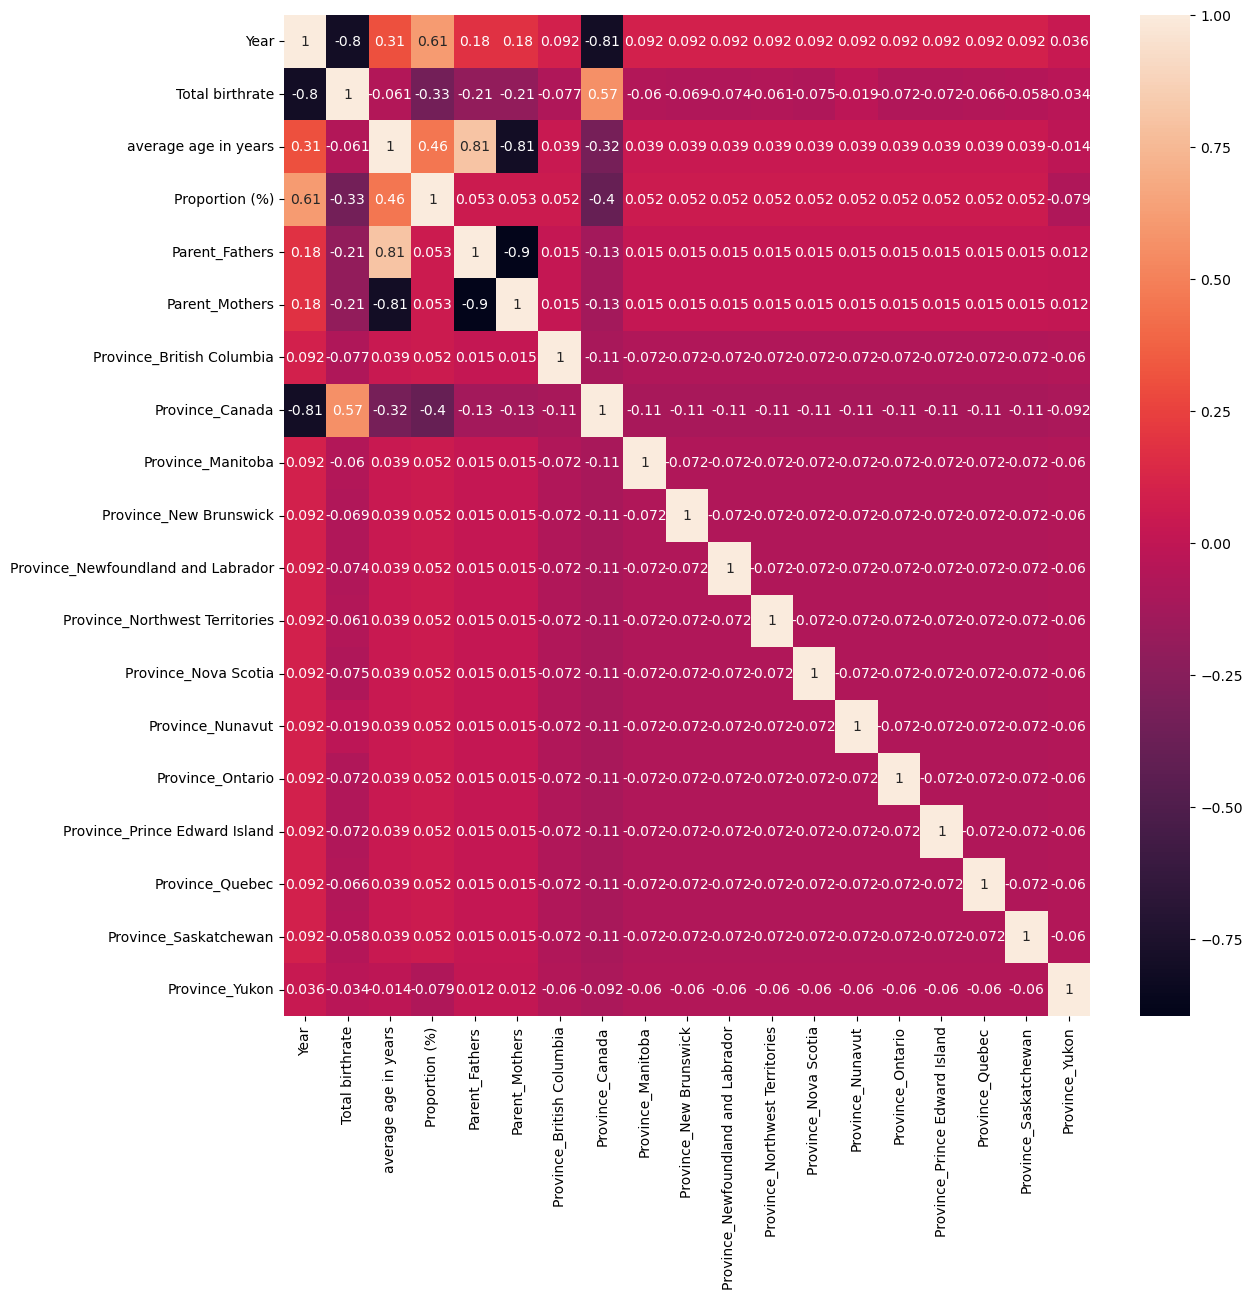

In [78]:
plt.figure(figsize = (13,13))
sns.heatmap(df.corr(),annot = True);

In [79]:
df.columns

Index(['Year', 'Total birthrate', 'average age in years', 'Proportion (%)',
       'Parent_Fathers', 'Parent_Mothers', 'Province_British Columbia',
       'Province_Canada', 'Province_Manitoba', 'Province_New Brunswick',
       'Province_Newfoundland and Labrador', 'Province_Northwest Territories',
       'Province_Nova Scotia', 'Province_Nunavut', 'Province_Ontario',
       'Province_Prince Edward Island', 'Province_Quebec',
       'Province_Saskatchewan', 'Province_Yukon'],
      dtype='object')

In [80]:
# Separate features and target variable
X = df.drop('Total birthrate', axis=1)
y = df['Total birthrate']

# Split data into train-test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [81]:
# Scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [82]:
# Selected Features
from sklearn.feature_selection import SelectKBest, f_regression
X_train = X_train.apply(pd.to_numeric, errors='coerce').fillna(0)
y_train = pd.to_numeric(y_train, errors='coerce').fillna(0)
selector = SelectKBest(score_func=f_regression, k=5)
X_train_selected = selector.fit_transform(X_train, y_train)
mask = selector.get_support()
selected_features = X_train.columns[mask]
print(selected_features)

Index(['Year', 'Proportion (%)', 'Parent_Fathers', 'Parent_Mothers',
       'Province_Canada'],
      dtype='object')


### Regression Models

#### Linear Regression model

In [83]:
# Linear Regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [84]:
y_pred = model.predict(X_test_scaled)

In [85]:
# Evaluate the model
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 0.017541156209907784
Mean Absolute Error: 0.08968632254171639
Root Mean Squared Error: 0.13244303005408697


In [86]:
# the coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

                                    Coefficient
Year                                  -0.180021
average age in years                   0.228533
Proportion (%)                        -0.077839
Parent_Fathers                        -0.558904
Parent_Mothers                        -0.364577
Province_British Columbia             -0.004287
Province_Canada                        0.018934
Province_Manitoba                     -0.001142
Province_New Brunswick                -0.002659
Province_Newfoundland and Labrador    -0.006945
Province_Northwest Territories        -0.001674
Province_Nova Scotia                  -0.007610
Province_Nunavut                       0.020246
Province_Ontario                      -0.004903
Province_Prince Edward Island         -0.001740
Province_Quebec                       -0.004776
Province_Saskatchewan                 -0.000641
Province_Yukon                         0.000542


In [87]:
# Define a grid of hyperparameters
from sklearn.model_selection import GridSearchCV
param_grid = {'fit_intercept': [True, False], 'copy_X': [True, False], 'positive': [True, False]}

In [88]:
# Initialize GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the scaled training data
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'positive': [True, False]},
             scoring='neg_mean_squared_error')

In [89]:
# Best parameters from grid search
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

Best parameters: {'copy_X': True, 'fit_intercept': True, 'positive': False}


In [90]:
# Best model from grid search
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)

In [91]:
# Evaluate the best model
mse_best = mean_squared_error(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)

print(f'Mean Squared Error of the best model: {mse_best}')
print(f'Mean Absolute Error of the best model: {mae_best}')
print(f'Root Mean Squared Error of the best model: {rmse_best}')

Mean Squared Error of the best model: 0.017541156209907784
Mean Absolute Error of the best model: 0.08968632254171639
Root Mean Squared Error of the best model: 0.13244303005408697


In [92]:
# Display the coefficients of the best model
coefficients_best = pd.DataFrame(best_model.coef_, X.columns, columns=['Coefficient'])
print(coefficients_best)

                                    Coefficient
Year                                  -0.180021
average age in years                   0.228533
Proportion (%)                        -0.077839
Parent_Fathers                        -0.558904
Parent_Mothers                        -0.364577
Province_British Columbia             -0.004287
Province_Canada                        0.018934
Province_Manitoba                     -0.001142
Province_New Brunswick                -0.002659
Province_Newfoundland and Labrador    -0.006945
Province_Northwest Territories        -0.001674
Province_Nova Scotia                  -0.007610
Province_Nunavut                       0.020246
Province_Ontario                      -0.004903
Province_Prince Edward Island         -0.001740
Province_Quebec                       -0.004776
Province_Saskatchewan                 -0.000641
Province_Yukon                         0.000542


Year: Birthrate decreases by 0.180 each year.

Average Age: Every increase in average age results in a 0.229 rise in birthrate.

Proportion (%): Higher proportion values slightly reduce birthrate by 0.078.

Parental Roles: The roles of fathers and mothers both contribute to a decline in birthrate, with fathers having a larger impact.

Provinces: Most provinces have minimal effect; Nunavut and Canada show a slight positive increase.

#### Random Forest model 

In [93]:
#the Random Forest Regressor model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [94]:
y_pred = model.predict(X_test_scaled)

In [95]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 0.0029055879200000035
Mean Absolute Error: 0.019236000000001
Root Mean Squared Error: 0.05390350563738878


In [96]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

#GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [97]:
# Best parameters from grid search
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [98]:
# Best model from grid search
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)

In [99]:
# Evaluate the best model
mse_best = mean_squared_error(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)

print(f'Mean Squared Error of the best model: {mse_best}')
print(f'Mean Absolute Error of the best model: {mae_best}')
print(f'Root Mean Squared Error of the best model: {rmse_best}')

Mean Squared Error of the best model: 0.002866194008888932
Mean Absolute Error of the best model: 0.018806933333336794
Root Mean Squared Error of the best model: 0.05353684720721731


Mean Squared Error (MSE): Lower MSE (0.0029) indicates that the model's predictions are very close to the actual values.

Mean Absolute Error (MAE): With a very low MAE (0.0188), your model’s average prediction error is minimal.

Root Mean Squared Error (RMSE): The low RMSE (0.0535) shows that the typical prediction error is small and hence, more reliable.

### Cross-Validation

#### Cross validation for Linear Regression model

In [100]:
from sklearn.model_selection import cross_val_score
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

linear_model = LinearRegression()
linear_scores = cross_val_score(linear_model, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
linear_scores = -linear_scores

# Calculate mean and standard deviation
linear_mean_score = np.mean(linear_scores)
linear_std_score = np.std(linear_scores)

print(f'Linear Regression CV Mean Squared Error: {linear_mean_score}')
print(f'Linear Regression CV Standard Deviation: {linear_std_score}')

Linear Regression CV Mean Squared Error: 7.360182561925805e+21
Linear Regression CV Standard Deviation: 1.4720365123851612e+22


Not good at all

#### Cross-validation for Random Forest

In [101]:
forest_model = RandomForestRegressor(random_state=42)
forest_scores = cross_val_score(forest_model, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
forest_scores = -forest_scores

# Calculate mean and standard deviation
forest_mean_score = np.mean(forest_scores)
forest_std_score = np.std(forest_scores)

print(f'Random Forest CV Mean Squared Error: {forest_mean_score}')
print(f'Random Forest CV Standard Deviation: {forest_std_score}')

Random Forest CV Mean Squared Error: 0.19699749297445152
Random Forest CV Standard Deviation: 0.3629079730115204


Random Forest model is delivering accurate and reliable predictions for the birthrate.n.

### Best model is the Random Forest! 

### Test the Final model

In [102]:
# new data
new_data = {
    'Year': [2023, 2024, 2025],
    'average age in years': [32.0, 32.5, 33.0],
    'Proportion (%)': [17.5, 17.8, 18.0],
    'Parent_Fathers': [0.0, 1.0, 0.0],
    'Parent_Mothers': [1.0, 0.0, 1.0],
    'Province_British Columbia': [0.0, 0.0, 1.0],
    'Province_Canada': [1.0, 1.0, 0.0],
    'Province_Manitoba': [0.0, 0.0, 0.0],
    'Province_New Brunswick': [0.0, 0.0, 0.0],
    'Province_Newfoundland and Labrador': [0.0, 0.0, 0.0],
    'Province_Northwest Territories': [0.0, 0.0, 0.0],
    'Province_Nova Scotia': [0.0, 0.0, 0.0],
    'Province_Nunavut': [0.0, 0.0, 0.0],
    'Province_Ontario': [0.0, 0.0, 0.0],
    'Province_Prince Edward Island': [0.0, 0.0, 0.0],
    'Province_Quebec': [0.0, 0.0, 0.0],
    'Province_Saskatchewan': [0.0, 0.0, 0.0],
    'Province_Yukon': [0.0, 0.0, 0.0]
}
new_data_df = pd.DataFrame(new_data)
new_data_df


,Year,average age in years,Proportion (%),Parent_Fathers,Parent_Mothers,Province_British Columbia,Province_Canada,Province_Manitoba,Province_New Brunswick,Province_Newfoundland and Labrador,Province_Northwest Territories,Province_Nova Scotia,Province_Nunavut,Province_Ontario,Province_Prince Edward Island,Province_Quebec,Province_Saskatchewan,Province_Yukon
0,2023,32.0,17.5,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2024,32.5,17.8,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2025,33.0,18.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [103]:
new_data_scaled = scaler.transform(new_data_df)

In [104]:
new_predictions = best_model.predict(new_data_scaled)
new_predictions_df = new_data_df.copy()
new_predictions_df['Predicted Total Birthrate'] = new_predictions
new_predictions_df

,Year,average age in years,Proportion (%),Parent_Fathers,Parent_Mothers,Province_British Columbia,Province_Canada,Province_Manitoba,Province_New Brunswick,Province_Newfoundland and Labrador,Province_Northwest Territories,Province_Nova Scotia,Province_Nunavut,Province_Ontario,Province_Prince Edward Island,Province_Quebec,Province_Saskatchewan,Province_Yukon,Predicted Total Birthrate
0,2023,32.0,17.5,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.330000
1,2024,32.5,17.8,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.330000
2,2025,33.0,18.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.329867


In [105]:
from sklearn.metrics import r2_score
y_pred_best = best_model.predict(X_test_scaled)
mse_best = mean_squared_error(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
r2_best = r2_score(y_test, y_pred_best)

print(f'Mean Squared Error of the best model: {mse_best}')
print(f'Mean Absolute Error of the best model: {mae_best}')
print(f'Root Mean Squared Error of the best model: {rmse_best}')
print(f'R-squared of the best model: {r2_best}')

Mean Squared Error of the best model: 0.002866194008888932
Mean Absolute Error of the best model: 0.018806933333336794
Root Mean Squared Error of the best model: 0.05353684720721731
R-squared of the best model: 0.9809956796722397


Mean Squared Error (MSE): low at 0.0029, indicating my predictions are very close to the actual values.

Mean Absolute Error (MAE): low at 0.0188, showing that the average prediction error is minimal.

Root Mean Squared Error (RMSE): At 0.0535, the model's accuracy.

R-squared (R²): At 0.981, indicating that 98% of the variability in birthrate is explained by my model!

## Thank you very much!